In [1]:
#Load in libraries
import pandas as pd
import numpy as np
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Headers and definitions
```
airline = Airline (asterisk indicates that regional subsidiaries are included)
avail_seat_km_per_week = Available seat kilometers flown every week
incidents_85_99 = Total number of incidents, 1985-1999
fatal_accidents_85_99 = Total number of fatal accidents, 1985-1999
fatalities_85_99 = Total number of fatalities, 1985-1999
incidents_00_14 = Total number of incidents, 2000-2014
fatal_accidents_00_14 = Total number of fatal accidents, 2000-2014
fatalities_00_14 = Total number of fatalities, 2000-2014
Referenced from: https://github.com/fivethirtyeight/data/tree/master/airline-safety
```

In [2]:
#Read in initial dataset
airsaf = pd.read_csv("airline-safety.csv")
airsaf.head()

,airline,avail_seat_km_per_week,incidents_85_99,fatal_accidents_85_99,fatalities_85_99,incidents_00_14,fatal_accidents_00_14,fatalities_00_14
0,Aer Lingus,320906734,2,0,0,0,0,0
1,Aeroflot*,1197672318,76,14,128,6,1,88
2,Aerolineas Argentinas,385803648,6,0,0,1,0,0
3,Aeromexico*,596871813,3,1,64,5,0,0
4,Air Canada,1865253802,2,0,0,2,0,0


In [3]:
#Grab info and check for null values
airsaf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   airline                 56 non-null     object
 1   avail_seat_km_per_week  56 non-null     int64 
 2   incidents_85_99         56 non-null     int64 
 3   fatal_accidents_85_99   56 non-null     int64 
 4   fatalities_85_99        56 non-null     int64 
 5   incidents_00_14         56 non-null     int64 
 6   fatal_accidents_00_14   56 non-null     int64 
 7   fatalities_00_14        56 non-null     int64 
dtypes: int64(7), object(1)
memory usage: 3.6+ KB


In [4]:
#Describe data
airsaf.describe()

,avail_seat_km_per_week,incidents_85_99,fatal_accidents_85_99,fatalities_85_99,incidents_00_14,fatal_accidents_00_14,fatalities_00_14
count,5.600000e+01,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000
mean,1.384621e+09,7.178571,2.178571,112.410714,4.125000,0.660714,55.517857
std,1.465317e+09,11.035656,2.861069,146.691114,4.544977,0.858684,111.332751
min,2.593733e+08,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.740362e+08,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,8.029089e+08,4.000000,1.000000,48.500000,3.000000,0.000000,0.000000
75%,1.847239e+09,8.000000,3.000000,184.250000,5.250000,1.000000,83.250000
max,7.139291e+09,76.000000,14.000000,535.000000,24.000000,3.000000,537.000000


In [2]:
frw = pd.read_csv("Financial_Results__1947-Present_data_world_airlines.csv")
frw.head()

,Year,Operating Revenues (mils),Operating Profit (mils),NetMargin,NetProfit (mils)
0,2018,814200.0,50900.0,0.041022,33400.0
1,2017,757600.0,59700.0,0.052930,40100.0
2,2016,709000.0,65200.0,0.050212,35600.0
3,2015,720500.0,59800.0,0.052047,37500.0
4,2014,766900.0,41700.0,0.022558,17300.0


In [3]:
frw.describe()

,Year,Operating Revenues (mils),Operating Profit (mils),NetMargin,NetProfit (mils)
count,288.00000,72.000000,72.000000,72.000000,72.000000
mean,1982.50000,204573.097222,7486.833333,0.004377,2828.625000
std,20.81878,241803.893050,15076.926617,0.030588,10416.911549
min,1947.00000,1050.000000,-11800.000000,-0.128571,-26100.000000
25%,1964.75000,9040.000000,21.750000,-0.013154,-106.000000
50%,1982.50000,95770.000000,880.500000,0.007585,122.000000
75%,2000.25000,306375.000000,8325.000000,0.024952,3550.000000
max,2018.00000,814200.000000,65200.000000,0.060955,40100.000000


In [4]:
fra = pd.read_csv("Financials_Full_Data_data_US_airlines.csv")
fra.head()

,Year,Fuel Expense,Labor Expense,Net Profit,Operating Profit,Other Expense*,Pre-Tax Profit,Total Operating Expense,Total Operating Revenue
0,1977,3618.257801,7481.103285,668.714122,874.218349,7449.610387,887.994015,18548.97147,19423.18982
1,1978,4040.031519,8569.217569,1176.463538,1320.030504,8315.245363,1353.999008,20924.49445,22244.52496
2,1979,6267.339501,9974.888406,324.859741,208.715808,9960.302291,148.149073,26202.53020,26411.24601
3,1980,9443.360496,11301.496430,50.957491,-189.312623,11394.950480,-156.621762,32139.80741,31950.49479
4,1981,10180.045020,12124.374280,-257.486974,-448.481629,12534.217460,-699.919566,34838.63676,34390.15513


In [5]:
fra.describe()

,Year,Fuel Expense,Labor Expense,Net Profit,Operating Profit,Other Expense*,Pre-Tax Profit,Total Operating Expense,Total Operating Revenue
count,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000
mean,1998.000000,18013.171028,27450.577172,1200.184259,4252.862313,45809.299041,1828.158556,91273.047246,95525.909555
std,12.556539,12917.781535,12128.124031,9444.937882,8383.754321,23463.508050,10338.566881,45873.664678,50998.303352
min,1977.000000,3618.257801,7481.103285,-28646.629860,-10365.128330,7449.610387,-27605.420970,18548.971470,19423.189820
25%,1987.500000,8870.132057,17121.895575,-793.799548,-318.897126,26859.538740,-1396.844708,51486.145625,53807.306565
50%,1998.000000,10311.256160,29424.570120,525.489792,1841.993085,46140.539880,846.892723,83907.579690,90142.867220
75%,2008.500000,27320.233725,34318.996570,4555.751812,6811.236294,66192.054280,6137.294049,130948.229950,138431.502250
max,2019.000000,47945.325490,56623.609680,24793.822910,27993.589030,86589.404500,23886.093690,175208.169700,196070.635400


In [7]:
tca = pd.read_csv("Traffic_&_Capacity_US_airlines.csv")
tca.head()

,Year,Cargo RTMs (mil),Departures (000),Load Factor,Passenger Enplanements (000) - Scheduled,Scheduled ASMs (000),Scheduled RPMs (000)
0,1950,318.0,2457.0,0.780419,19220.0,13125000.0,10243000.0
1,1951,381.0,2596.0,0.845597,24851.0,15615000.0,13204000.0
2,1952,421.0,2737.0,0.815023,27567.0,19170000.0,15624000.0
3,1953,444.0,2960.0,0.781806,31646.0,23337000.0,18245000.0
4,1954,470.0,3002.0,0.765656,35448.0,26922000.0,20613000.0


In [8]:
tca.describe()

,Year,Cargo RTMs (mil),Departures (000),Load Factor,Passenger Enplanements (000) - Scheduled,Scheduled ASMs (000),Scheduled RPMs (000)
count,70.000000,70.000000,70.000000,70.000000,70.000000,7.000000e+01,7.000000e+01
mean,1984.500000,16279.319089,6750.071043,0.709632,395227.388771,5.457454e+08,3.969572e+08
std,20.351085,14746.878404,2799.261310,0.086482,278256.435901,3.975970e+08,3.209321e+08
min,1950.000000,318.000000,2457.000000,0.537316,19220.000000,1.312500e+07,1.024300e+07
25%,1967.250000,3621.500000,4474.721500,0.627177,147419.500000,1.419928e+08,1.025498e+08
50%,1984.500000,8611.823228,5720.673500,0.710066,363351.465000,5.315559e+08,3.207594e+08
75%,2001.750000,30778.829383,9499.510500,0.780943,644592.108000,9.274882e+08,6.560039e+08
max,2019.000000,43759.956580,11884.482000,0.846469,926737.964000,1.247052e+09,1.055591e+09


In [9]:
tcw = pd.read_csv("Traffic_and_Operations__1929-Present_World_airlines.csv")
tcw.head()

,Year,Aircraft Deps (000),Aircraft KMs (mils),ASKs (mils),Cargo RTKs (mils),Freight RTKs (mils),Freight Tonnes (mils),Mail RTKs (mils),Pax (mils),PLF,RPKs (mils)
0,1929,NaN,90.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,170.0
1,1930,NaN,120.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,270.0
2,1931,NaN,135.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,330.0
3,1932,NaN,140.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,405.0
4,1933,NaN,155.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,545.0


In [10]:
tcw.describe()

,Year,Aircraft Deps (000),Aircraft KMs (mils),ASKs (mils),Cargo RTKs (mils),Freight RTKs (mils),Freight Tonnes (mils),Mail RTKs (mils),Pax (mils),PLF,RPKs (mils)
count,90.000000,59.000000,90.000000,6.900000e+01,74.000000,74.000000,50.000000,74.000000,74.000000,69.000000,9.000000e+01
mean,1973.500000,17630.109436,12913.798874,2.809533e+06,67607.677484,64259.208891,25.281250,3348.468590,1102.897784,0.658198,1.571047e+06
std,26.124701,9586.678082,14612.944441,2.668193e+06,72829.245112,71072.135391,15.861057,2165.238985,1117.395829,0.080621,2.065414e+06
min,1929.000000,6600.000000,90.000000,4.600000e+04,220.000000,110.000000,3.970000,100.000000,9.000000,0.519871,1.700000e+02
25%,1951.250000,9786.000000,1660.000000,4.790000e+05,4145.000000,3272.500000,11.208750,872.500000,140.000000,0.601475,3.625000e+04
50%,1973.500000,13945.000000,7445.500000,1.972296e+06,35044.000000,31209.500000,19.472500,3834.500000,759.961500,0.648065,6.373050e+05
75%,1995.750000,25507.312530,20318.250000,4.443204e+06,122299.515475,117041.281825,38.395101,5069.750000,1694.781772,0.710702,2.385825e+06
max,2018.000000,37822.685900,54278.578730,1.010514e+07,238360.638200,230967.364300,57.967748,7449.136282,4322.354493,0.817171,8.257635e+06


In [11]:
stock = pd.read_csv("airline stocks.csv")
stock.head()

,Date,Open,High,Low,Close,Volume
0,1/22/2021,185.22,185.22,185.22,185.22,0
1,1/21/2021,187.01,187.01,187.01,187.01,0
2,1/20/2021,191.38,191.38,191.38,191.38,0
3,1/19/2021,186.77,186.77,186.77,186.77,0
4,1/18/2021,184.83,184.83,184.83,184.83,0


In [12]:
stock.describe()

,Open,High,Low,Close,Volume
count,261.000000,261.000000,261.000000,261.000000,261.0
mean,159.453448,159.453448,159.453448,159.453448,0.0
std,43.329326,43.329326,43.329326,43.329326,0.0
min,91.710000,91.710000,91.710000,91.710000,0.0
25%,130.420000,130.420000,130.420000,130.420000,0.0
50%,148.770000,148.770000,148.770000,148.770000,0.0
75%,184.150000,184.150000,184.150000,184.150000,0.0
max,273.500000,273.500000,273.500000,273.500000,0.0


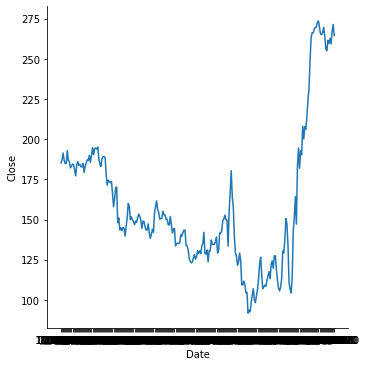

In [13]:
sns.relplot(x = 'Date', y = 'Close', estimator = None, kind = 'line', data = stock)